**Evaluating the differences in consumption of 17 types of food per person per week for countries in the UK.**


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

In [10]:
print(df,end = '\n\n')
print('shape = ',df.shape)

                     England  Wales  Scotland  N.Ireland
Cheese                   105    103       103         66
Carcass_meat             245    227       242        267
Other_meat               685    803       750        586
Fish                     147    160       122         93
Fats_and_oils            193    235       184        209
Sugars                   156    175       147        139
Fresh_potatoes           720    874       566       1033
Fresh_Veg                253    265       171        143
Other_Veg                488    570       418        355
Processed_potatoes       198    203       220        187
Processed_Veg            360    365       337        334
Fresh_fruit             1102   1137       957        674
Cereals                 1472   1582      1462       1494
Beverages                 57     73        53         47
Soft_drinks             1374   1256      1572       1506
Alcoholic_drinks         375    475       458        135
Confectionery             54   

In [12]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


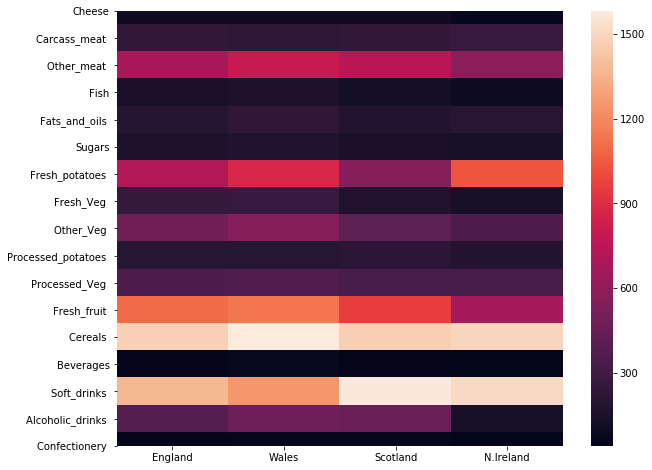

In [19]:
plt.figure(figsize=[10,8])
sns.heatmap(df)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [24]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

In [25]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

In [27]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.transpose().values)

In [33]:
print(scaled_df,end='\n\n')
print('shape',scaled_df.shape)

[[1.         0.45       0.4562212  0.80597015 0.17647059 0.47222222
  0.32976445 0.90163934 0.61860465 0.33333333 0.83870968 0.92440605
  0.08333333 0.38461538 0.37341772 0.70588235 0.56521739]
 [0.94871795 0.         1.         1.         1.         1.
  0.65952891 1.         1.         0.48484848 1.         1.
  1.         1.         0.         1.         1.        ]
 [0.94871795 0.375      0.75576037 0.43283582 0.         0.22222222
  0.         0.2295082  0.29302326 1.         0.09677419 0.6112311
  0.         0.23076923 1.         0.95       0.91304348]
 [0.         1.         0.         0.         0.49019608 0.
  1.         0.         0.         0.         0.         0.
  0.26666667 0.         0.79113924 0.         0.        ]]

shape (4, 17)


In [34]:
autoencoder.fit(scaled_df,scaled_df,epochs = 15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 1s 127ms/sample - loss: 0.4203
Epoch 2/15
4/4 [==============================] - 0s 452us/sample - loss: 0.3245
Epoch 3/15
4/4 [==============================] - 0s 446us/sample - loss: 0.2660
Epoch 4/15
4/4 [==============================] - 0s 456us/sample - loss: 0.2414
Epoch 5/15
4/4 [==============================] - 0s 446us/sample - loss: 0.2324
Epoch 6/15
4/4 [==============================] - 0s 463us/sample - loss: 0.2275
Epoch 7/15
4/4 [==============================] - 0s 420us/sample - loss: 0.2240
Epoch 8/15
4/4 [==============================] - 0s 388us/sample - loss: 0.2208
Epoch 9/15
4/4 [==============================] - 0s 450us/sample - loss: 0.2178
Epoch 10/15
4/4 [==============================] - 0s 405us/sample - loss: 0.2147
Epoch 11/15
4/4 [==============================] - 0s 374us/sample - loss: 0.2117
Epoch 12/15
4/4 [==============================] - 0s 504us/sample - loss: 0.2088
Epoch 

In [35]:
encoded_data = encoder.predict(scaled_df)

In [36]:
encoded_data

array([[0.        , 1.4241589 ],
       [0.        , 2.593348  ],
       [0.        , 1.3893571 ],
       [0.05627408, 0.        ]], dtype=float32)

In [37]:
df.columns

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [45]:
encoded_df = pd.DataFrame(encoded_data,index = df.columns,columns = ['c1','c2'])
encoded_df = encoded_df.reset_index()
print(encoded_df)

       index        c1        c2
0    England  0.000000  1.424159
1      Wales  0.000000  2.593348
2   Scotland  0.000000  1.389357
3  N.Ireland  0.056274  0.000000


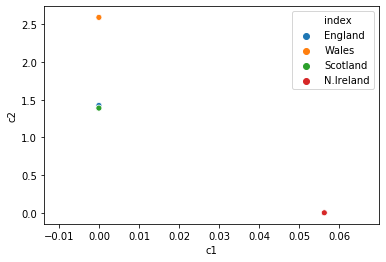

In [59]:
sns.scatterplot(x='c1',y='c2',hue='index',data=encoded_df)
